# Exercise: Bayesian Regression 
In this notebook we want to have a look at a simple regression problem. In this case we provided with the following skeleton of code. There is a function called `func` which creates y data points as a sine wave. The data and the true data (the sine wave) is plotted. 

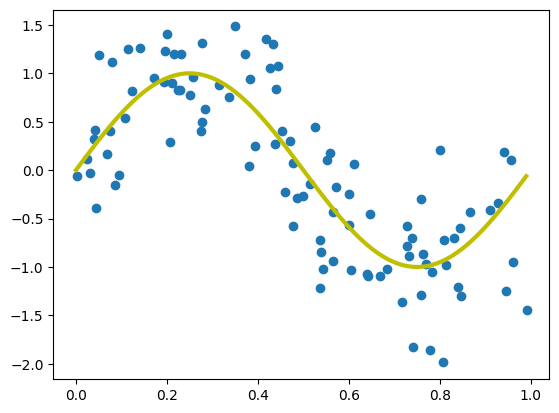

In [66]:
from sklearn.linear_model import BayesianRidge
import numpy as np
from matplotlib import pyplot as plt


def func(x):
    return np.sin(2 * np.pi * x)

# Generate data
N = 100
x = np.random.uniform(size=N)
y_no_noise = func(x)
y = y_no_noise + np.random.normal(loc=0, scale=0.5, size=N)
f, ax = plt.subplots(1, 1)

x_no_noise = np.arange(0, 1, 0.01)
y_no_noise = func(x_no_noise)
ax.scatter(x, y, label="Noisy Observations")
ax.plot(x_no_noise, y_no_noise, label="True Function", c='y', linewidth=3)

n_order = 3
X_train = np.vander(x, n_order + 1, increasing=True) # creates polynomial features. use these to fit your model

x_test = np.arange(0, 1, 0.01)
x_test_poly_features = np.vander(x_test, n_order + 1, increasing=True) # creates polynomial features. use these to test your model

plt.show()

Now we want to actually define a bayesian model and train it. 

In [67]:
clf = BayesianRidge()
clf.fit(X_train,y)
y_mean = clf.predict(x_test_poly_features)


The only thing left to do is to plot the data.

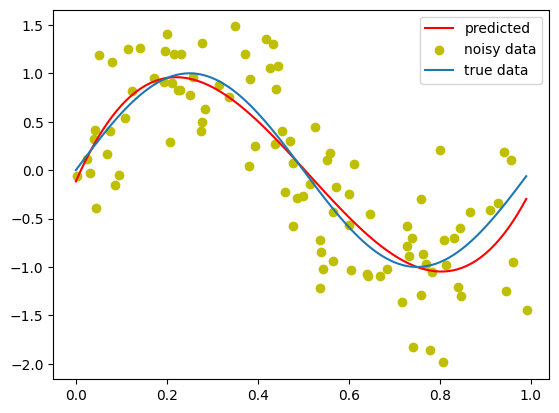

In [68]:
f, ax = plt.subplots(1, 1)
ax.plot(x_test, y_mean, label="predicted",c='r')
ax.scatter(x,y,c='y', label="noisy data")
ax.plot(x_no_noise,y_no_noise, label="true data")
ax.legend()

plt.show()